<a href="https://colab.research.google.com/github/TongSii/hds5210-2025/blob/main/week12/week12_assignment_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is`condemn.txt` in Canvas in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [22]:
import pandas as pd
condemnations = pd.read_csv("condemn.csv")
condemnations.shape

/var/folders/9k/4d73k6qd5p741tz07_q10bqr0000gn/T/ipykernel_35740/3697540622.py:2: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  condemnations = pd.read_csv("condemn.csv")


(32586, 40)

In [23]:
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'])

In [24]:
condemnations = condemnations[(condemnations['InspectDate'] >= '1986-01-01') & (condemnations['InspectDate'] <= '2014-12-31')]
print(condemnations.shape)

(30232, 40)


In [25]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [27]:
import numpy as np
by_year = condemnations.pivot_table(values='AcctNum', index=condemnations['InspectDate'].dt.year, columns='Status', aggfunc=np.ma.count, fill_value=0)
print(by_year)


Status          B    L   R    W
InspectDate                    
1986           22   12  19  112
1987           91   20   8  361
1988          215   16  15  297
1989          277   15  11  432
1990          119   29   8  322
1991          139   18   4  351
1992          204   30   4  258
1993          185   47   2  193
1994          208   94   5  293
1995          176  127   0  268
1996          214  171   0  794
1997          281  328   0  878
1998          254  343   0  599
1999          272  283   0  826
2000          320  268   0  529
2001          381  262   0  296
2002          383  227   0  317
2003          361  201   0  282
2004          354  204   0  381
2005          410  237   0  345
2006          479  233  20  370
2007          613  262   0  341
2008          700  254   0  334
2009          785  223   0  200
2010         1161  193   0  154
2011         1028  275   0  107
2012          738  257   1   28
2013          185  209   1    2
2014           17  128   0    0


In [28]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='InspectDate'>

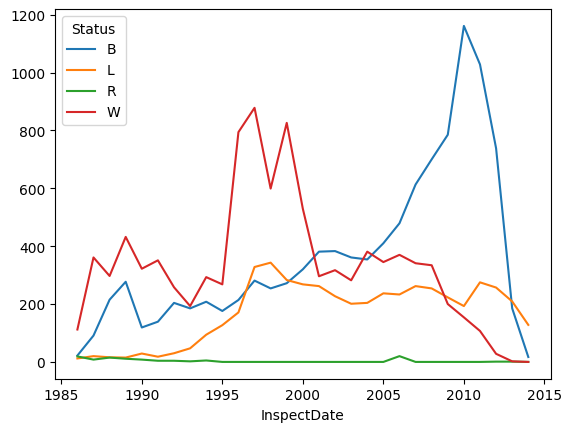

In [29]:
%matplotlib inline
by_year.plot()

---

In [ ]:
Details about the graph plot:

It provides the data analysis of the data provided from 1986 to 2014. The data is filtered based on the 'InspectDate' column to include only entries within this date. After filtering, a table named by_year is created to summarize the count of each unique valuein the ‘status’ for each year.

Based on the table data after filtering the graph plot is drawn with 4 columns B, L, R, W, the values represent the count of the condemnations of each type in year. The graph iss plot using .plot() method.

According to the graph ‘B’ is having the highest value followed by ‘W’ and ‘L’ and at last with ‘G’.



# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [31]:
import pandas as pd

meetings = pd.read_csv("meetings.csv")

In [34]:
meetings.columns

Index(['meeting_uuid', 'meetingTitle', 'meetingId', 'userName', 'user_id',
       'user_tags', 'endTime', 'startTime', 'email', 'participantSeconds',
       'joinDate', 'joinWeek', 'joinMonth', 'participants',
       'participantMinutes', 'meetingDurationMinutes', 'popId', 'userType',
       'billable', 'moderatorLess', 'start_time', 'total_highlights_created',
       'smart_meeting', 'transcription_used',
       'total_transcription_duration_minutes'],
      dtype='object')

In [36]:
meetings['startDate'] = meetings['startTime'].str[0:10]
meetings.loc[meetings['startDate'].between('2020-02-17', '2020-02-28'), 'label'] = 'BEFORE'
meetings.loc[meetings['startDate'].between('2020-03-16', '2020-03-27'), 'label'] = 'DURING'

In [37]:
summary = pd.pivot_table(meetings, values='meeting_uuid', index='userName', columns='label', aggfunc='count', fill_value=0)

summary['pctChange'] = ((summary['DURING'] - summary['BEFORE']) / summary['BEFORE'])
summary.mean()
print(summary) 

label                           BEFORE  DURING  pctChange
userName                                                 
Drew.Marco                          12      19   0.583333
amit.bhagat                         17      30   0.764706
andrea.bryant.amitechsolutions       5       3  -0.400000
angie.warren                         5       9   0.800000
chris.rogers.amitechsolutions        4       3  -0.250000
eric.keeney                         15      27   0.800000
eric.rodman                          4      12   2.000000
jeff.hatfield.amitechsolutions      13      26   1.000000
jennifer.patton.amitechs             5       7   0.400000
jessica.sikora                       3       7   1.333333
matt.allsup                          5       0  -1.000000
matt.brown.amitechsolutions          1       2   1.000000
melissa.menne                       10       9  -0.100000
michael.demos                        5      11   1.200000
paul.boal                           15      35   1.333333
paul.smith.ami

---

In [ ]:
assert(len(summary) == 22)

In [ ]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
